In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
df1 = pd.read_csv("bank-full.csv", sep=';') 
df2 = pd.read_csv("bank.csv", sep=';') 
df_combined = pd.concat([df1, df2], ignore_index=True)

print(df_combined)

       age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married    unknown      no     1506     yes   no   
4       33        unknown   single    unknown      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day month  duration  campaign  pda

In [8]:
df_combined.head()          # İlk 5 sətri göstər
df_combined.info()          # Sütun adları, tiplər və boş dəyərlər
df_combined.describe()      # Rəqəmsal sütunların statistikası

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#Label encoding
le = LabelEncoder()
df_combined['education'] = le.fit_transform(df_combined['education'])  # primary=0, secondary=1, tertiary=2, unknown=3

In [19]:
df_combined = pd.get_dummies(df_combined, columns=['job', 'marital', 'contact', 'month', 'poutcome'], drop_first=True)

In [14]:
df_combined['default'] = df_combined['default'].map({'yes':1, 'no':0})
df_combined['housing'] = df_combined['housing'].map({'yes':1, 'no':0})
df_combined['loan'] = df_combined['loan'].map({'yes':1, 'no':0})
df_combined['y'] = df_combined['y'].map({'yes':1, 'no':0})

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']  # rəqəmsal sütunlar
df_combined[num_cols] = scaler.fit_transform(df_combined[num_cols])

In [22]:
df_combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.605529,management,married,tertiary,0,0.254880,1,0,unknown,5,may,0.008962,-0.57003,-0.411068,-0.255849,unknown,0
1,0.286628,technician,single,secondary,0,-0.440154,1,0,unknown,5,may,-0.417824,-0.57003,-0.411068,-0.255849,unknown,0
2,-0.749651,entrepreneur,married,secondary,0,-0.449031,1,1,unknown,5,may,-0.708814,-0.57003,-0.411068,-0.255849,unknown,0
3,0.569250,blue-collar,married,unknown,0,0.045450,1,0,unknown,5,may,-0.646736,-0.57003,-0.411068,-0.255849,unknown,0
4,-0.749651,unknown,single,unknown,0,-0.449359,0,0,unknown,5,may,-0.235470,-0.57003,-0.411068,-0.255849,unknown,0


In [24]:
from sklearn.cluster import KMeans

# Optimal klaster sayı üçün ilkin yoxlama (məsələn, 4 seçirik)
kmeans = KMeans(n_clusters=4, random_state=42)
df_combined['cluster'] = kmeans.fit_predict(df_combined[num_cols])

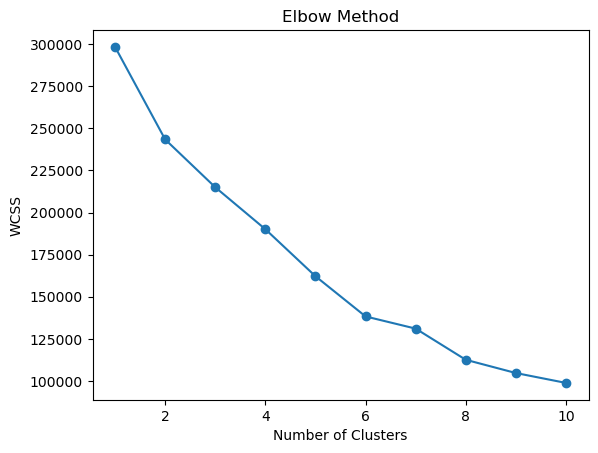

In [28]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_combined[num_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_combined[num_cols])

df_combined['pca1'] = components[:, 0]
df_combined['pca2'] = components[:, 1]

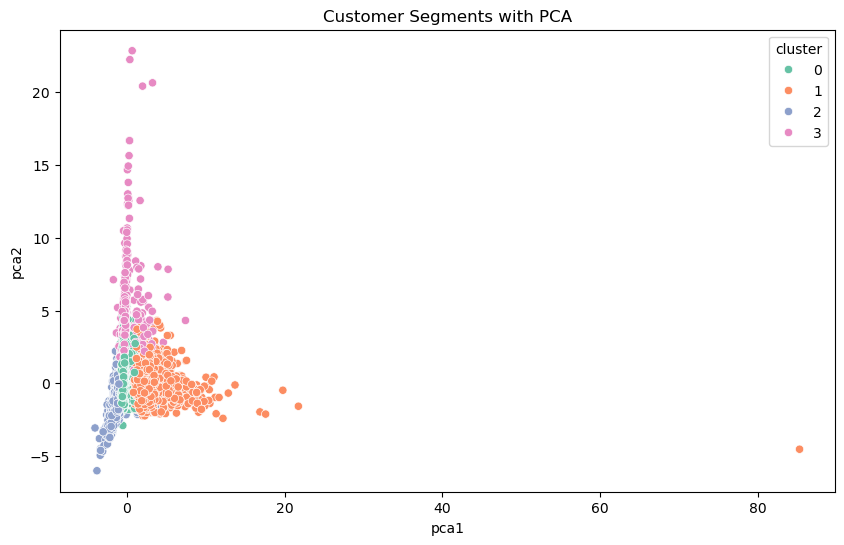

In [41]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_combined, palette='Set2')
plt.title('Customer Segments with PCA')
plt.show()

In [45]:
df_combined.groupby('cluster')[num_cols].mean()

,age,balance,duration,campaign,pdays,previous
cluster,,,,,,
0,-0.010248,-0.150713,0.012500,-0.137712,-0.380910,-0.228797
1,-0.020849,-0.064971,0.013080,-0.218099,2.129088,1.275953
2,-0.029912,-0.146098,-0.370874,3.813387,-0.398232,-0.243293
3,0.347598,3.774190,0.065033,-0.111144,-0.137816,-0.066106


In [ ]:
Klasterlər
0	Sabit və passiv müştərilər- Orta dəyərli, az reaksiya
1	Kampaniya tərəfdarı müştərilər- pdays və previous yüksək
2	Həddən artıq zəng olunan, maraqsız- campaign çox, duration az
3	VIP və yüksək dəyərli müştərilər- balans çox yüksək, zənglər uzun